## Early Stopping

* A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [11]:
import warnings

warnings.filterwarnings("ignore")

In [20]:
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# sgd_reg = SGDRegressor(tol=-np.infty, ...)
sgd_reg = SGDRegressor(max_iter=1, tol=0.00001, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

#### Code 
* Deepcopy function from the copy module. This function is used to create a deep copy of an object, including all nested objects, to avoid any unintended side effects when modifying the copied object 
[DeepCopy](https://docs.python.org/3/library/copy.html#:~:text=A%20deep%20copy%20constructs%20a,objects%20found%20in%20the%20original)
* tol=-np.infty: It sets the tolerance to negative infinity, essentially disabling early stopping based on the tolerance.
* warm_start=True, when the fit() method is called, it just continues
training where it left off instead of restarting from scratch.
* learning_rate="constant": The learning rate remains constant during training.
eta0=0.0005: The initial learning rate.

#### Here's how early stopping works with constant learning rate:

* The training process begins with an initial constant learning rate.
* The model is trained on the training data, and the performance is evaluated on a separate validation set.
* The performance metric on the validation set is monitored during training. If the performance improves or remains relatively stable for a certain number of epochs, training continues.
* If the performance on the validation set starts deteriorating (e.g., validation loss starts increasing or accuracy starts decreasing), early stopping is triggered.
* When early stopping is triggered, the training process is stopped, and the model parameters from the epoch with the best performance on the validation set are saved. These parameters correspond to the best model during the training process.

Create the graph:

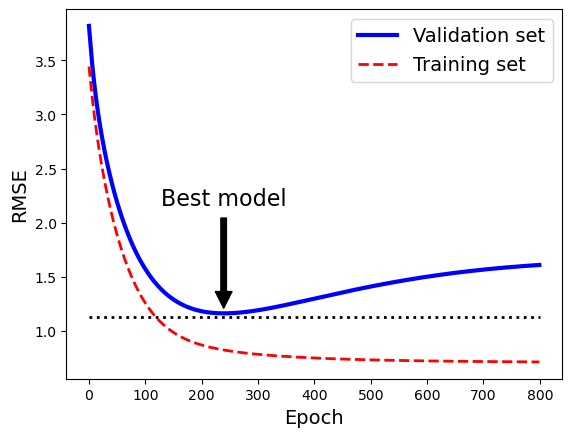

In [15]:
import matplotlib.pyplot as plt

sgd_reg = SGDRegressor(max_iter=1, tol=0.00001, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 800
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [ ]:
# while the validation is increases, and training is decreases => it's go to overfitting 

* Complex model (in this case a high-degree
Polynomial Regression model) being trained using Batch Gradient Descent. 
* As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set
naturally goes down, and so does its prediction error on the validation set
* After a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data. With early stop‐
ping you just stop training as soon as the validation error reaches the minimum

In [49]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))